In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("PopulationEstimates.xls",skiprows=2)

In [3]:
df.head()

,FIPStxt,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2019,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780125,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54597,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182265,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27455,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664


In [4]:
plt.figure(figsize=(8,6))

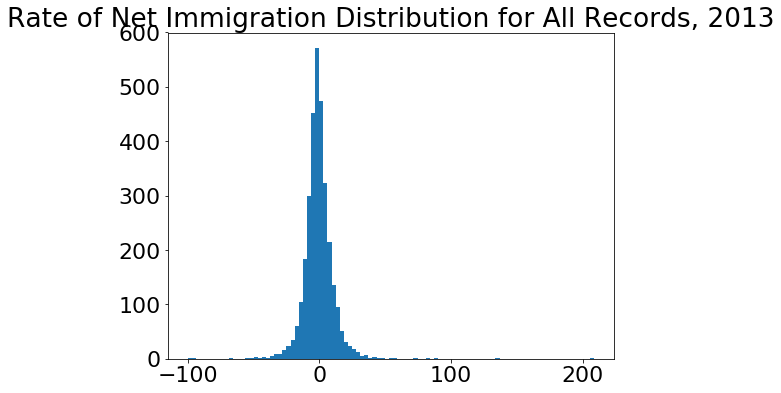

In [5]:
plt.rcParams.update({'font.size':22})
plt.hist(df["R_NET_MIG_2013"].dropna().values,bins=np.linspace(np.nanmin(df["R_NET_MIG_2013"]),np.nanmax(df["R_NET_MIG_2013"]),100))
plt.title("Rate of Net Immigration Distribution for All Records, 2013")
plt.show()

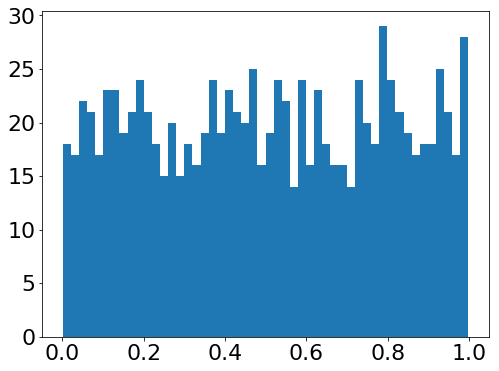

In [6]:
import random

random.seed(2021)

plt.figure(figsize=(8,6))
rvs = [random.random() for _ in range(1000)]
plt.hist(rvs,bins=50)
plt.show()

In [7]:
np.mean(rvs)

0.5048858787489642

In [8]:
np.median(rvs)

0.5026630148178393

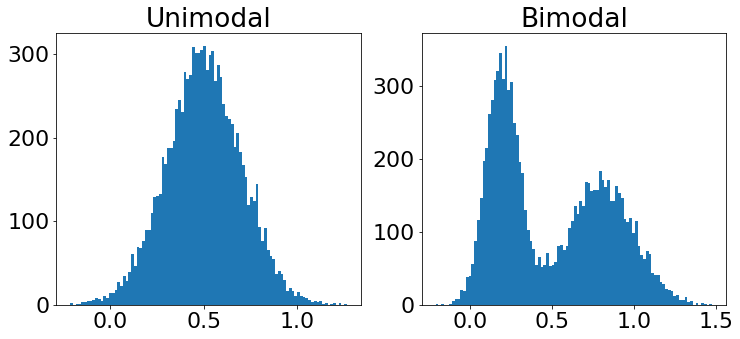

In [9]:
# Bimodal distribution

r1 = [random.normalvariate(0.5,0.2) for _ in range(10000)]
r2 = [random.normalvariate(0.2,0.1) for _ in range(5000)]
r3 = [random.normalvariate(0.8,0.2) for _ in range(5000)]

fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].hist(r1,bins=100)
axes[0].set_title("Unimodal")
axes[1].hist(r2+r3,bins=100)
axes[1].set_title("Bimodal")
plt.show()

In [10]:
np.std(r1)

0.20041583245950909

In [11]:
import math
math.sqrt(np.var(r1))

0.20041583245950909

In [12]:
dfTX = df[df["State"] == "TX"].tail(-1)
years = [year for year in range(2011,2019)]
means = []
stds = []

for i in range(2011,2019):
    year = "R_NET_MIG_" + str(i)
    means.append(np.mean(dfTX[year]))
    stds.append(np.std(dfTX[year]))

In [13]:
plt.figure(figsize=(10,8))

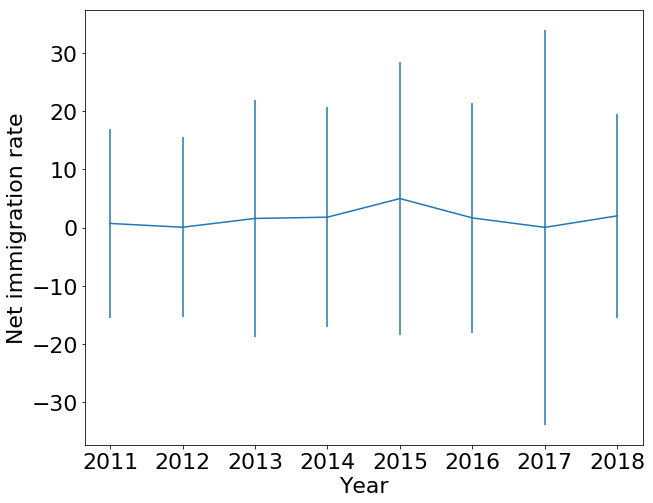

In [14]:
plt.errorbar(years,means,yerr=stds)
plt.xlabel("Year")
plt.ylabel("Net immigration rate")
plt.show()

## Quartiles

In [16]:
np.quantile(dfTX["R_NET_MIG_2013"],[0.25,0.5,0.75])

array([-7.88684884,  0.85134219,  8.8348733 ])

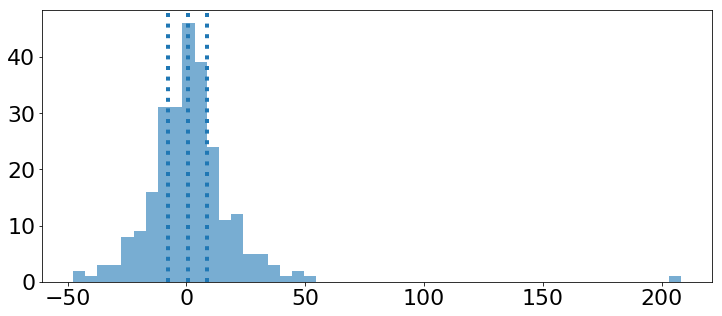

In [19]:
plt.figure(figsize=(12,5))
plt.hist(dfTX["R_NET_MIG_2013"],bins=50,alpha=0.6)
for quartile in np.quantile(dfTX["R_NET_MIG_2013"],[0.25,0.5,0.75]):
    plt.axvline(quartile,linestyle=":",linewidth=4)
plt.show()